# Multiple Linear Regression

## Data Pre-processing

In [17]:
#1. Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#2. Importing the dataset
df = pd.read_csv('Data/50_Startups.csv')
print("The dataset preview:\n")
print(df.head())

#3. Missing data
#Step 3.1.1: Is there any missing data?
df.info()
# Method 3.1.2: print number of null valyes
missing_values = df.isnull().sum()
print(missing_values)

# Step 3.2: Fill the missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df.iloc[:, 1:3])            # Apply on all numerical columns
df.iloc[:, 1:3] = imputer.transform(df.iloc[:, 1:3])            # Replace


#4. Encoding Categorical and Binary data
# Step 4.1: 自动识别binary columns和categorical columns
binary_columns = []
categorical_columns = []

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        if df[col].nunique() == 2:
            binary_columns.append(col)
        elif df[col].nunique() > 2:
            categorical_columns.append(col)

print("Binary Columns:", binary_columns)
print("Categorical Columns:", categorical_columns)


# Step 4.2: categorical columns - One-hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

df_encoded = pd.DataFrame(ct.fit_transform(df))

# # Step 4.3: Binary columns - Binary columns: Label encoding, 仅适用于单列binary的情况
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_encoded.iloc[:, -1] = le.fit_transform(df_encoded.iloc[:, -1])

# # Step 4.3: Binary columns - Binary columns: Binary columns: Ordinal Encoder, 可用在多列binary columns的情况
# from sklearn.preprocessing import OrdinalEncoder
# 
# ct = ColumnTransformer(
#     transformers=[('ordinal_encoder', OrdinalEncoder(), binary_columns)],
#     remainder='passthrough'
# )
# 
# # 将 DataFrame 转换为 NumPy 数组并进行编码
# df_encoded = np.array(ct.fit_transform(df_encoded))

print("The encoded dataset preview:\n")
print(df_encoded)


#5. X and y values
X = df_encoded.iloc[:, :-1].values
y = df_encoded.iloc[:, -1].values

#6. Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#7. Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
# X_test[:, 3:] = sc.transform(X_test[:, 3:])
# print(X_train)
# print(X_test)

The dataset preview:

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Prof

## Training the Multiple Linear Regression model on the Training set

#### Note:
- We don't need to manually check the dummy variable trap, the following class take care of this automatically.
- The class we use to do single linear regression and multiple linear regression are exactly the same.

In [18]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
np.set_printoptions(precision=2)

In [21]:
y_pred

array([103015.2 , 132582.28, 132447.74,  71976.1 , 178537.48, 116161.24,
        67851.69,  98791.73, 113969.44, 167921.07])

In [22]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [23]:
# Concatenate
# 2 vectors: the predicted results and the actual results
# y_pred, y_test are 2 horizontal vectors, and needs to reshape to convert it to vertical
# -1是让np自动计算大小的意思
# axis为0或1，0是做vertical concatenation的意思，1是horizontal
print(np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)), axis=1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


## Visualization

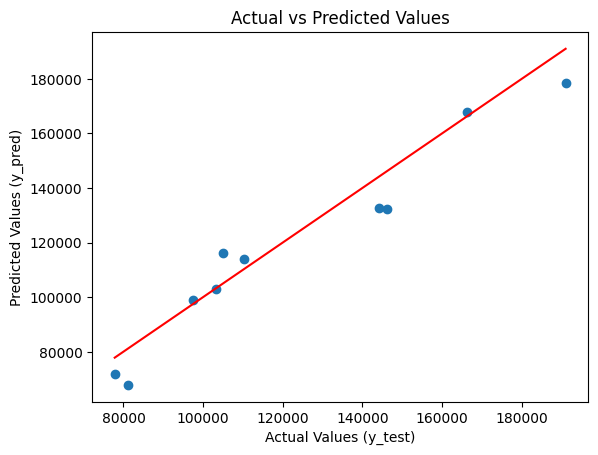

In [24]:
# 1. Scatter Plot

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 绘制理想情况的参考线
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.show()

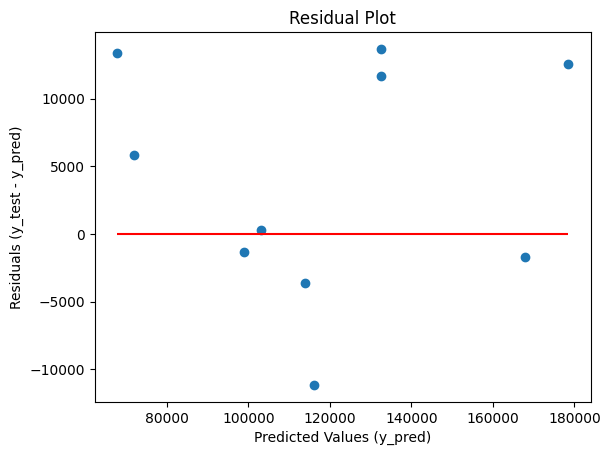

In [25]:
# 2. Residual Plot
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')  # 参考线 y=0
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals (y_test - y_pred)')
plt.title('Residual Plot')
plt.show()



## Coefficient

In [26]:
print(regressor.intercept_)

42467.52924857642


In [27]:
print(regressor.coef_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]


Therefore, the equation of our multiple linear regression model is:

$$\textrm{Profit} = 86.6 \times \textrm{Dummy State 1} - 873 \times \textrm{Dummy State 2} + 786 \times \textrm{Dummy State 3} + 0.773 \times \textrm{R&D Spend} + 0.0329 \times \textrm{Administration} + 0.0366 \times \textrm{Marketing Spend} + 42467.53$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

### Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [28]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


#### Note:
Needs 2D dimension input